In [6]:
import pandas as pd
# unzip ml-20.zip into cwd
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [7]:
df = ratings.join(movies, on='movieId', rsuffix='drop').drop(columns=['movieId', 'movieIddrop'])
df.head()

,userId,rating,timestamp,title,genres
0,1,3.5,1112486027,Grumpier Old Men (1995),Comedy|Romance
1,1,3.5,1112484676,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
2,1,3.5,1112484819,Wings of Courage (1995),Adventure|Romance|IMAX
3,1,3.5,1112484727,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
4,1,3.5,1112484580,Guardian Angel (1994),Action|Drama|Thriller


In [8]:
len(movies), len(ratings), len(ratings) / len(movies)

(27278, 20000263, 733.2012244299435)

In [9]:
df.title.to_pickle('title')

In [1]:
import pandas as pd
titles = pd.read_pickle('title').fillna('null')

In [2]:
titles.head()

0                              Grumpier Old Men (1995)
1    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
2                              Wings of Courage (1995)
3                                    Pocahontas (1995)
4                                Guardian Angel (1994)
Name: title, dtype: object

In [3]:
len(titles)

20000263

In [4]:
cat_titles = titles.astype(
    pd.api.types.CategoricalDtype(
        pd.unique(titles)))
len(cat_titles.cat.categories)

9260

In [5]:
len(cat_titles.cat.codes)

20000263

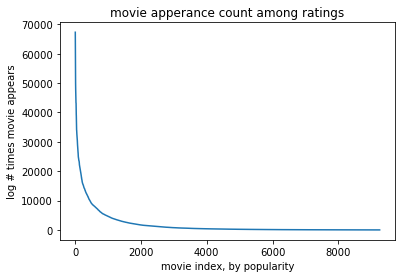

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
counts_desc = cat_titles.value_counts().values
assert sorted(counts_desc, reverse=True)

plt.plot(counts_desc[1:]) # 0-th is too large
plt.xlabel("movie index, by popularity")
plt.ylabel("log # times movie appears")
plt.title("movie apperance count among ratings")
plt.show()

In [7]:
import numpy as np
cdf = counts_desc.cumsum() / counts_desc.sum()
np.searchsorted(cdf, [.95, .99, .999, 1])

array([3204, 5575, 7918, 9259])

In [1]:
import numpy as np
from collections import Counter
from scipy.stats import truncnorm
%load_ext memory_profiler
d = 10000
e = 1000
n = 100000000
if d < n:
    dindices = np.random.geometric(p=0.01, size=(n - d)) - 1
    dindices = np.concatenate([dindices, np.arange(d)])
    dcounts = np.bincount(dindices)
    selected = dcounts.argsort()[::-1][:e]
else:
    dindices = np.random.choice(d, n // 2)
    frequent = np.random.choice(n, n - n // 2)
    dindices = np.concatenate([dindices, frequent])
    c = Counter(dindices)
    selected = np.asarray(sorted(c, key=c.get, reverse=True)[:e])

In [2]:
%%memit

searched = np.searchsorted(selected, dindices)
selected2 = np.append(selected, [-1])
searched[selected2[searched] != dindices] = -1
searched[searched == -1] = e
result = searched

peak memory: 2401.04 MiB, increment: 1546.69 MiB


In [3]:
%%timeit

searched = np.searchsorted(selected, dindices)
selected2 = np.append(selected, [-1])
searched[selected2[searched] != dindices] = -1
searched[searched == -1] = e
result = searched

5.07 s ± 55.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%memit
mapping = np.full(d, e)
mapping[selected] = np.arange(e)
dindices = np.take(mapping, dindices)

peak memory: 1501.95 MiB, increment: 647.29 MiB


In [3]:
%%timeit
mapping = np.full(d, e)
mapping[selected] = np.arange(e)
dindices = np.take(mapping, dindices)

330 ms ± 6.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
